<a href="https://colab.research.google.com/github/belmo95/ml-product-reviews-project/blob/main/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product reviews analysis
**Autor:Belmin Kovacevic**

In [32]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/belmo95/ml-product-reviews-project/main/data/product_reviews_full.csv"
df = pd.read_csv(url)
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


**Provera nedostajućih vrednosti po kolonama**

In [8]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


**Vizualizacija nedostajućih vrednosti**

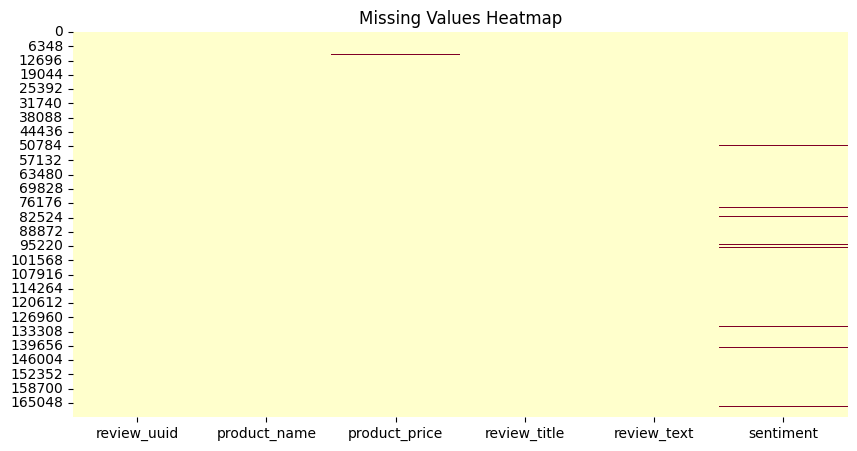

In [9]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

**Numerički uvid u raspodelu sentimenta**

In [10]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


**Vizualizacija**

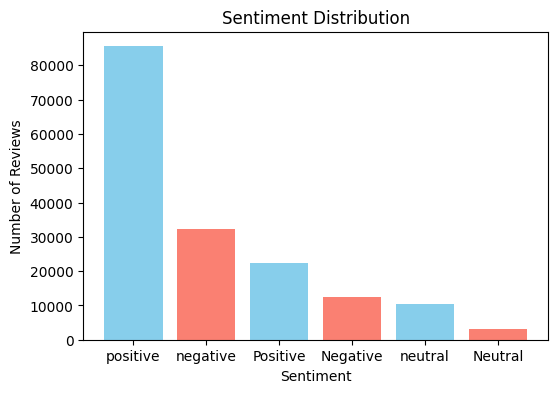

In [11]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


**Mini-aktivnost: Šta se dešava sa cenama?**

In [12]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


**uklonjanje svih redova sa nedostajućim vrednostima**

In [13]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


**Mini-aktivnost: Koliko podataka smo izgubili?**

In [14]:
# Count the number of rows before removing missing values
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")

 Randomly selected rows containing missing values:

Empty DataFrame
Columns: [review_uuid, product_name, product_price, review_title, review_text, sentiment]
Index: []

 Removal statistics:
- Number of rows before: 165960
- Number of rows after: 165960
- Number of removed rows: 0


**Pretvaramo vrednosti u tekst i čistimo ih.
Uklanjamo dolar znak, nepotrebne karaktere i razmake**

In [15]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)


Pretvaramo očišćeni tekst u numerički tip (float).

In [11]:
# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

Brišemo privremenu kolonu.

In [16]:
# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

Uklanjamo redove gde je cena i dalje NaN (neuspešna konverzija).

In [17]:
# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

Proveravamo rezultat.

In [18]:
# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())

Column type after parsing: object

Price summary:
count     165960
unique       948
top         2.63
freq        4362
Name: product_price, dtype: object


** Standardizacija vrednosti u koloni sentiment**

In [19]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

Sentiment column converted to type: category


**Uklanjamo iz našeg DataFramea kolone koje su nepotrebne za nas ML**

In [20]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


**Da li zadržati kolonu product_price u modelu?**

Price summary by sentiment:
            count unique     top  freq
sentiment                             
negative    44663    900  126.49   915
neutral     13678    779  126.49   245
positive   107619    662    2.63  4100


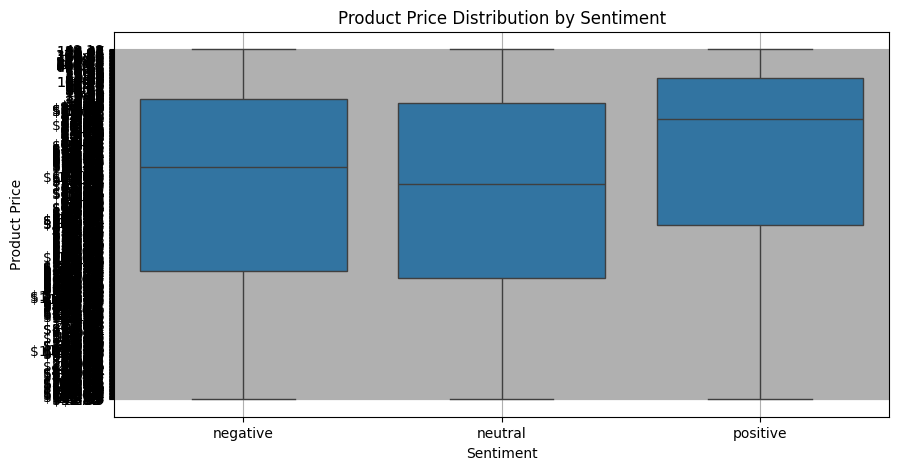

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()


**Posto cijena ne utjece na recenziju,izbacujem i kolonu "Product_price"**

In [22]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['product_price'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['review_title', 'review_text', 'sentiment']


**Šta je sledeće što radimo?Dodajemo novu kolonu – U DataFrame unosimo kolonu review_length, sa brojem karaktera svake recenzije.
Analiziramo osnovne statistike – Pogledamo prosečnu, minimalnu i maksimalnu dužinu recenzija.
Poređenje po sentimentu – Ispitujemo da li se dužina recenzije razlikuje kod pozitivnih, negativnih i neutralnih recenzija.
Vizualizacija – Pravimo boxplot koji jasno pokazuje razlike u dužini recenzija za svaku kategoriju sentimenta.**

Review length summary:
count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


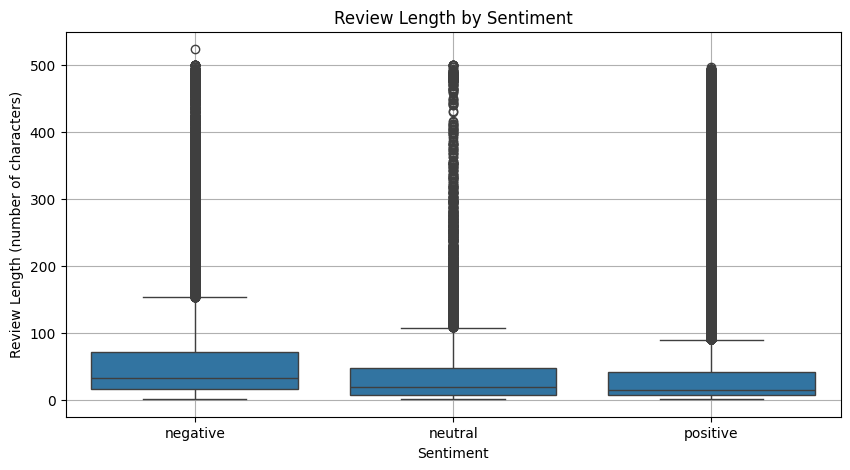

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()

# Treniranje algoritma

**podelu podataka na ulazne karakteristike i ciljnu promenljivu**

In [24]:
# Features and label
X = df[["review_title", "review_text", "review_length"]]
y = df["sentiment"]

**Zatim ćemo podeliti podatke na skup za treniranje (80%) i skup za testiranja(20%) kako bismo mogli da validiramo koliko model dobro radi na podacima koje nikada ranije nije video:**

In [25]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Od sirovih reči do brojeva: Priprema podataka za mašinsko učenje**
Za sve to ćemo da koristimo:

TfidfVectorizer za kolone review_title i review_text – ovaj alat pretvara tekst u brojeve na osnovu značaja reči (TF–IDF).
MinMaxScaler za kolonu review_length – ovaj alat svodi sve vrednosti na raspon između 0 i 1.
Sve ove transformacije grupisaćemo u okviru jednog objekta – ColumnTransformer – koji spaja sve podatke u jedinstvenu numeričku matricu spremnu za treniranje.

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "review_title"),
        ("text", TfidfVectorizer(), "review_text"),
        ("length", MinMaxScaler(), ["review_length"])
    ]
)

**Ko je ovde najbolji? Definisanje, treniranje i evaluacija modela**
Šta radimo u ovoj fazi?

Sada prvi put koristimo pipeline – cevovod kroz koji prolaze svi naši podaci.

Prvo tekst i brojevi ulaze u obradu (TF–IDF, skaliranje...).
Onda različiti modeli pokušavaju da nauče obrasce iz podataka.
Na kraju, svaki model pokazuje svoje rezultate – i sve to elegantno u par linija koda!


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import joblib

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),


}

# Train and evaluate
for name, model in models.items():
    print(f"\n {name}")
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

    joblib.dump(pipeline, "model/sentiment_model.pkl")

print(" Model trained and saved as 'model/sentiment_model.pkl'")


 Logistic Regression
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      8932
     neutral       0.72      0.54      0.62      2736
    positive       0.96      0.97      0.97     21524

    accuracy                           0.92     33192
   macro avg       0.86      0.81      0.83     33192
weighted avg       0.92      0.92      0.92     33192

 Model trained and saved as 'model/sentiment_model.pkl'


**citanje spremljenog i istreniranog algoritma**

In [36]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load("model/sentiment_model.pkl")

print("Model loaded successfully!")
print("Type 'exit' at any point to stop.\n")

while True:
    title = input(" Enter review title: ")
    if title.lower() == "exit":
        print("Exiting...")
        break

    text = input(" Enter review text: ")
    if text.lower() == "exit":
        print("Exiting...")
        break

    # Compute review length
    review_length = len(text)

    # Create a DataFrame from input
    user_input = pd.DataFrame([{
        "review_title": title,
        "review_text": text,
        "review_length": review_length
    }])

    # Predict sentiment
    prediction = model.predict(user_input)[0]
    print(f" Predicted sentiment: {prediction}\n" + "-" * 40)


Model loaded successfully!
Type 'exit' at any point to stop.

 Enter review title: its very good
 Enter review text: its very good
 Predicted sentiment: positive
----------------------------------------
 Enter review title: pc
 Enter review text: its bad
 Predicted sentiment: negative
----------------------------------------


KeyboardInterrupt: Interrupted by user